In [2]:
import pandas as pd

train_path = "C:/Users/hp/Downloads/pins/archive/SMS_train.csv"
test_path = "C:/Users/hp/Downloads/pins/archive/SMS_test.csv"

train_df = pd.read_csv(train_path, encoding='latin1')
test_df = pd.read_csv(test_path, encoding='latin1')

print(train_df.head())
print(test_df.head())

   S. No.                                       Message_body     Label
0       1                         Rofl. Its true to its name  Non-Spam
1       2  The guy did some bitching but I acted like i'd...  Non-Spam
2       3  Pity, * was in mood for that. So...any other s...  Non-Spam
3       4               Will ü b going to esplanade fr home?  Non-Spam
4       5  This is the 2nd time we have tried 2 contact u...      Spam
   S. No.                                       Message_body Label
0       1  UpgrdCentre Orange customer, you may now claim...  Spam
1       2  Loan for any purpose £500 - £75,000. Homeowner...  Spam
2       3  Congrats! Nokia 3650 video camera phone is you...  Spam
3       4  URGENT! Your Mobile number has been awarded wi...  Spam
4       5  Someone has contacted our dating service and e...  Spam


In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Text Processing

In [5]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

train_df['Message_body'] = train_df['Message_body'].apply(preprocess_text)
test_df['Message_body'] = test_df['Message_body'].apply(preprocess_text)

print(train_df.head())
print(test_df.head())

   S. No.                                       Message_body     Label
0       1                                     rofl true name  Non-Spam
1       2  guy bitch act like id interest buy someth el n...  Non-Spam
2       3                            piti mood soani suggest  Non-Spam
3       4                            ü b go esplanad fr home  Non-Spam
4       5  2nd time tri 2 contact u u £750 pound prize 2 ...      Spam
   S. No.                                       Message_body Label
0       1  upgrdcentr orang custom may claim free camera ...  Spam
1       2  loan purpos £500 £75000 homeown tenant welcom ...  Spam
2       3  congrat nokia 3650 video camera phone call 090...  Spam
3       4  urgent mobil number award £2000 prize guarante...  Spam
4       5  someon contact date servic enter phone fanci f...  Spam


# Data Preparation

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract features using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['Message_body'])
X_test = vectorizer.transform(test_df['Message_body'])
y_train = train_df['Label']
y_test = test_df['Label']

print(X_train.shape)
print(X_test.shape)

(957, 2767)
(125, 2767)


# Model Building

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Spam')
    recall = recall_score(y_test, y_pred, pos_label='Spam')
    f1 = f1_score(y_test, y_pred, pos_label='Spam')
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    return y_pred, y_prob

results = {}

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred, y_prob = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {
        "y_pred": y_pred,
        "y_prob": y_prob,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, pos_label='Spam'),
        "recall": recall_score(y_test, y_pred, pos_label='Spam'),
        "f1": f1_score(y_test, y_pred, pos_label='Spam'),
        "roc_auc": roc_auc_score(y_test, y_prob)
    }


Evaluating Logistic Regression...
Accuracy: 0.6240
Precision: 1.0000
Recall: 0.3816
F1-score: 0.5524
ROC-AUC: 0.9844
Evaluating Naive Bayes...
Accuracy: 0.6880
Precision: 1.0000
Recall: 0.4868
F1-score: 0.6549
ROC-AUC: 0.9530
Evaluating Support Vector Machine...
Accuracy: 0.7280
Precision: 1.0000
Recall: 0.5526
F1-score: 0.7119
ROC-AUC: 0.9863
Evaluating Random Forest...
Accuracy: 0.7360
Precision: 1.0000
Recall: 0.5658
F1-score: 0.7227
ROC-AUC: 0.9889


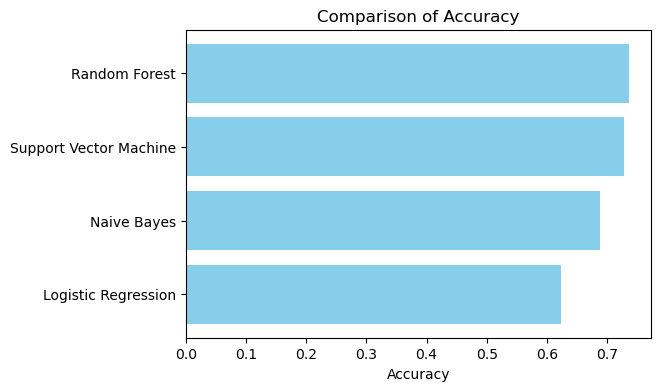

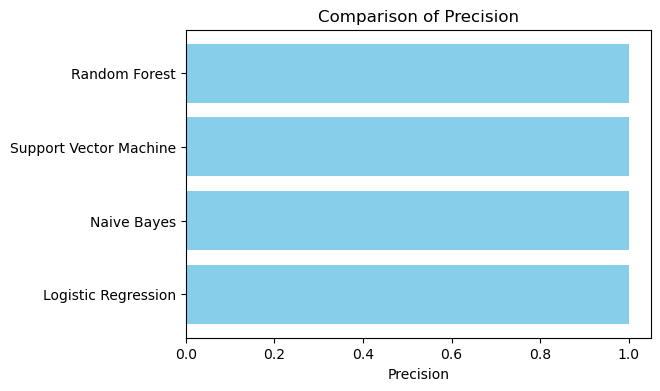

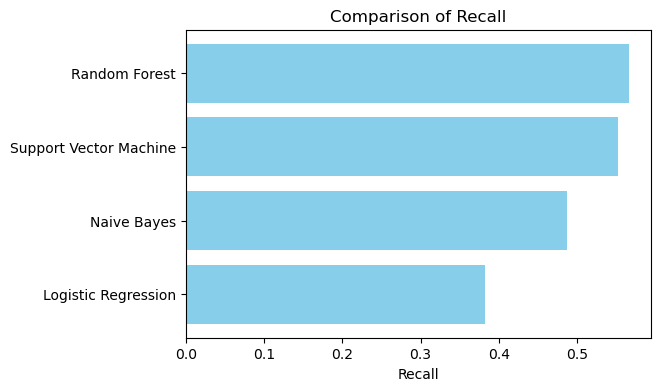

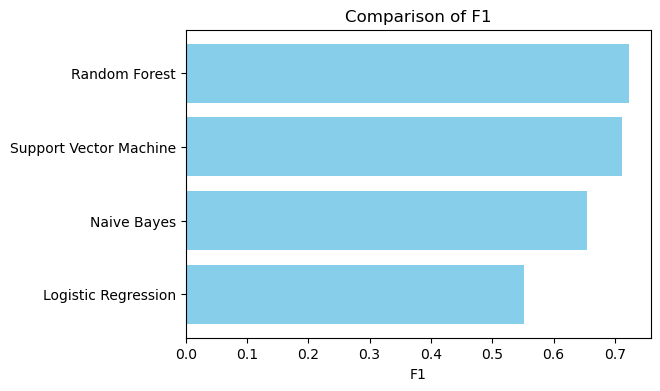

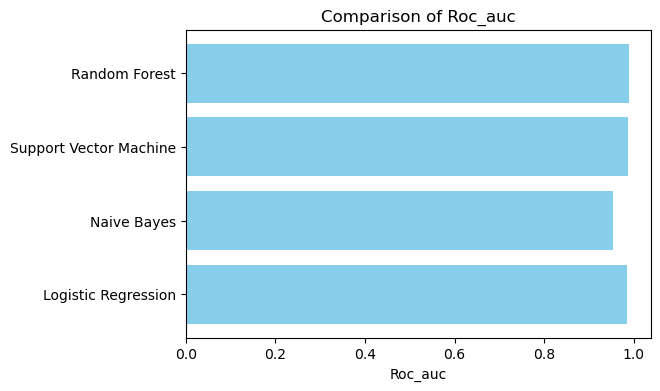

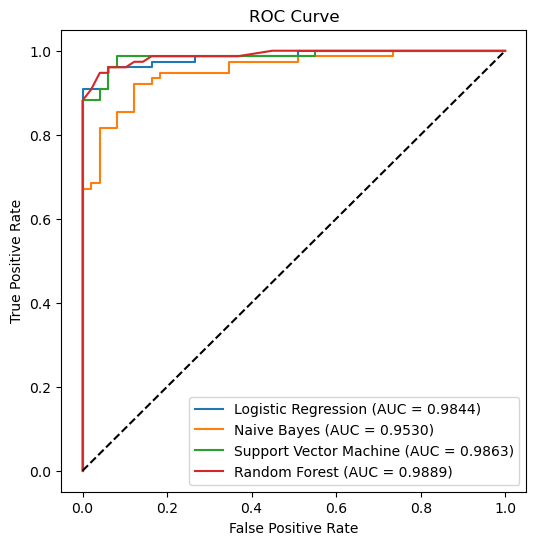

In [10]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

for metric in metrics:
    values = [results[model][metric] for model in models]
    plt.figure(figsize=(6, 4))
    plt.barh(list(models.keys()), values, color='skyblue')
    plt.xlabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()}')
    plt.show()

plt.figure(figsize=(6, 6))

for name, model in models.items():
    y_prob = results[name]["y_prob"]
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Spam')
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["roc_auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()